In [21]:
from utils.load_dataset import PlantVillageDataset
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split, Subset
from utils.preprocessing import preprocessing_img
import torchvision.models  as models
from torchvision import transforms
from utils.linear_model import LinearHeadModel, train_linear_model
from utils.ensemble_model import WeightedEnsemble, train_ensemble_weights
import numpy as np

## Import data and loaders

In [2]:
from create_datasets import create_dataloader

PATH = './Plant_leave_diseases_dataset_without_augmentation'
transform = transforms.Compose([
    preprocessing_img,
    transforms.ToTensor(),
])
train_models_dataloaders, test_models_dataloaders, train_validation_dataloader, test_validation_dataloader, training_data = create_dataloader(PATH, transform)

## Vizualize the data

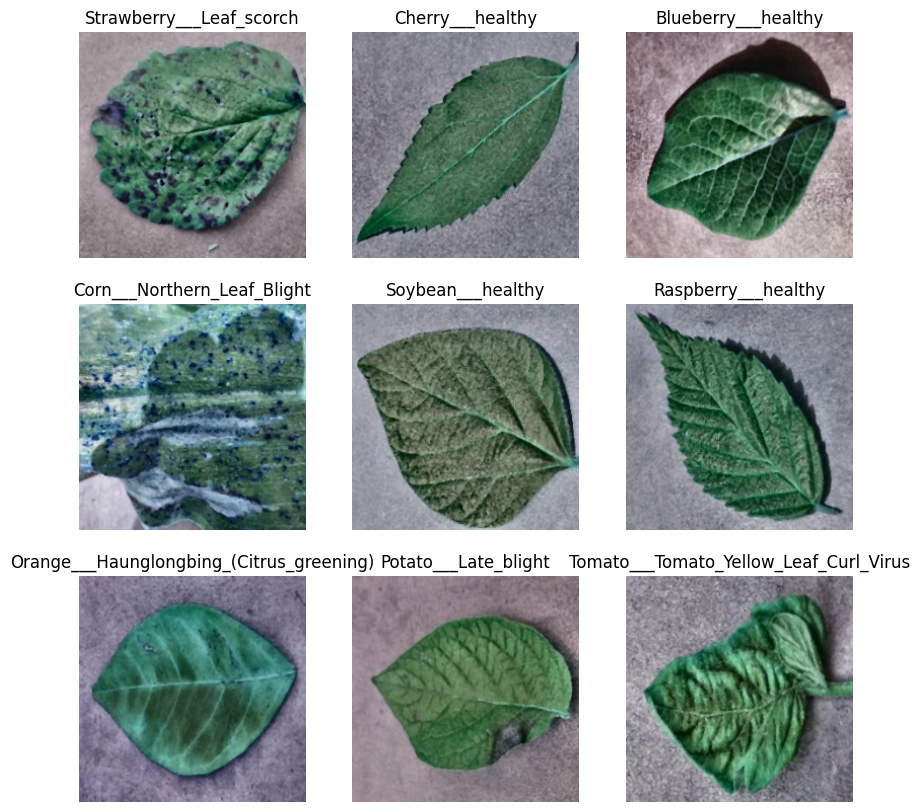

In [3]:
figure = plt.figure(figsize=(10, 10))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(list(training_data.label_to_idx.keys())[label])
    plt.axis("off")
    plt.imshow(img.swapaxes(0,2))
plt.show()

## Load Models

In [4]:
# ResNet50
resnet50 = models.resnet50(weights='ResNet50_Weights.DEFAULT')
for param in resnet50.parameters():
    param.requires_grad = False

# DenseNet201
densenet = models.densenet201(weights=models.DenseNet201_Weights.DEFAULT)
for param in densenet.parameters():
    param.requires_grad = False

# EfficientNetB0
efficientnet_b0 = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)
for param in efficientnet_b0.parameters():
    param.requires_grad = False

# EfficientNetB3
efficientnet_b3 = models.efficientnet_b3(weights=models.EfficientNet_B3_Weights.IMAGENET1K_V1)
for param in efficientnet_b3.parameters():
    param.requires_grad = False

In [5]:
models_list = [resnet50, densenet, efficientnet_b0, efficientnet_b3]

In [6]:
# Set device
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

In [7]:
# Constants
num_classes = 38
from dim_constants import input_dim_resnet, input_dim_densenet, input_dim_b0, input_dim_b3

## Train models

### ResNet50

In [10]:
resnet50_classifier = train_linear_model(0, 
                                        input_dim_resnet, 
                                        num_classes, 
                                        models_list, 
                                        train_models_dataloaders, 
                                        test_models_dataloaders, 
                                        device)

Epoch 1/10, Loss: 1.9246, Test Accuracy: 0.5051
Epoch 2/10, Loss: 1.8209, Test Accuracy: 0.6126
Epoch 3/10, Loss: 1.7625, Test Accuracy: 0.6851
Epoch 4/10, Loss: 1.7313, Test Accuracy: 0.7146
Epoch 5/10, Loss: 1.7073, Test Accuracy: 0.7760
Epoch 6/10, Loss: 1.6838, Test Accuracy: 0.8131
Epoch 7/10, Loss: 1.6686, Test Accuracy: 0.8272
Epoch 8/10, Loss: 1.6632, Test Accuracy: 0.8326
Epoch 9/10, Loss: 1.6560, Test Accuracy: 0.8333
Epoch 10/10, Loss: 1.6466, Test Accuracy: 0.8333


### Densenet

In [12]:
densenet_classifier = train_linear_model(1, 
                                        input_dim_densenet, 
                                        num_classes, 
                                        models_list, 
                                        train_models_dataloaders, 
                                        test_models_dataloaders, 
                                        device)

Epoch 1/10, Loss: 1.9217, Test Accuracy: 0.5087
Epoch 2/10, Loss: 1.7915, Test Accuracy: 0.6566
Epoch 3/10, Loss: 1.7332, Test Accuracy: 0.7698
Epoch 4/10, Loss: 1.6907, Test Accuracy: 0.8034
Epoch 5/10, Loss: 1.6684, Test Accuracy: 0.8380
Epoch 6/10, Loss: 1.6543, Test Accuracy: 0.8377
Epoch 7/10, Loss: 1.6492, Test Accuracy: 0.8384
Epoch 8/10, Loss: 1.6491, Test Accuracy: 0.8503
Epoch 9/10, Loss: 1.6459, Test Accuracy: 0.8604
Epoch 10/10, Loss: 1.6477, Test Accuracy: 0.8319


### EfficientNetB0

In [13]:
efficientnet_b0_classifier = train_linear_model(2, 
                                        input_dim_b0, 
                                        num_classes, 
                                        models_list, 
                                        train_models_dataloaders, 
                                        test_models_dataloaders, 
                                        device)

Epoch 1/10, Loss: 1.9498, Test Accuracy: 0.4563
Epoch 2/10, Loss: 1.8336, Test Accuracy: 0.6180
Epoch 3/10, Loss: 1.7663, Test Accuracy: 0.6977
Epoch 4/10, Loss: 1.7345, Test Accuracy: 0.7547
Epoch 5/10, Loss: 1.7118, Test Accuracy: 0.7709
Epoch 6/10, Loss: 1.6990, Test Accuracy: 0.7861
Epoch 7/10, Loss: 1.6881, Test Accuracy: 0.8016
Epoch 8/10, Loss: 1.6835, Test Accuracy: 0.8074
Epoch 9/10, Loss: 1.6785, Test Accuracy: 0.8146
Epoch 10/10, Loss: 1.6722, Test Accuracy: 0.8117


### EfficientNetB3

In [14]:
efficientnet_b3_classifier = train_linear_model(3, 
                                        input_dim_b3, 
                                        num_classes, 
                                        models_list, 
                                        train_models_dataloaders, 
                                        test_models_dataloaders, 
                                        device)

Epoch 1/10, Loss: 1.9516, Test Accuracy: 0.4899
Epoch 2/10, Loss: 1.8378, Test Accuracy: 0.5653
Epoch 3/10, Loss: 1.8052, Test Accuracy: 0.6061
Epoch 4/10, Loss: 1.7773, Test Accuracy: 0.6468
Epoch 5/10, Loss: 1.7585, Test Accuracy: 0.6771
Epoch 6/10, Loss: 1.7495, Test Accuracy: 0.6966
Epoch 7/10, Loss: 1.7394, Test Accuracy: 0.7168
Epoch 8/10, Loss: 1.7306, Test Accuracy: 0.7276
Epoch 9/10, Loss: 1.7238, Test Accuracy: 0.7399
Epoch 10/10, Loss: 1.7125, Test Accuracy: 0.7511


## Save models

In [166]:
def save_model(model, path):
    torch.save(model.state_dict(), path)
    print(f"Final model saved to {path}")

In [167]:
# Paths for saving
densenet201_path = "densenet201.pth"
efficientnet_b0_path = "efficientnet_b0.pth"
efficientnet_b3_path = "efficientnet_b3.pth"
resnet50_path = "resnet50.pth"

In [168]:
save_model(resnet50_classifier, f'models/{resnet50_path}')
save_model(densenet_classifier, f'models/{densenet201_path}')
save_model(efficientnet_b0_classifier, f'models/{efficientnet_b0_path}')
save_model(efficientnet_b3_classifier, f'models/{efficientnet_b3_path}')

Final model saved to models/resnet50.pth
Final model saved to models/densenet201.pth
Final model saved to models/efficientnet_b0.pth
Final model saved to models/efficientnet_b3.pth


In [17]:
from dim_constants import input_dim_resnet,  input_dim_densenet, input_dim_b0, input_dim_b3
num_classes = 38
output_dim = num_classes + 1

# Ensemble Learning

In [54]:
import importlib
import utils
importlib.reload(utils.ensemble_model)
from utils.ensemble_model import train_ensemble_weights, WeightedEnsemble

In [55]:
# List of pretrained models
models_list = [resnet50, densenet, efficientnet_b0, efficientnet_b3]

# Define the ensemble
ensemble = WeightedEnsemble(models_list, output_dim)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam([ensemble.weights], lr=0.01) 

# Train the ensemble weights
train_ensemble_weights(ensemble, criterion, optimizer, train_validation_dataloader, test_validation_dataloader)

Loss: 3.6297, Test Accuracy: 0.8643


In [57]:
# Evaluate on test set
correct = 0
total = 0
with torch.no_grad():
    for i, (inputs, labels) in enumerate(test_validation_dataloader):

        inputs, labels = inputs.to(device), labels.to(device)
        
        # Initialize a zero tensor for averaging
        final_outputs = torch.zeros(inputs.size(0), output_dim).to(device)
        
        for model in models_list:
            model.eval()  # Ensure the model is in evaluation mode
            outputs = model(inputs).to(device)
            _, predicted = torch.max(final_outputs, 1)
            final_outputs += outputs  # Accumulate outputs from each model
        
        # Average the accumulated outputs
        final_outputs /= len(models_list)
        
        # Compute predictions and accuracy
        _, predicted = torch.max(final_outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate test accuracy
    test_accuracy = correct / total

    print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.8985
